# TITANIC SURVIVAL PREDICTION

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score





In [2]:
#LOAD & CALL DATASET
titanic_dataset=pd.read_csv('tested.csv')
titanic_dataset.head(6)


PassengerId  Survived  Pclass   
0          892         0       3  \
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   

                                           Name     Sex   Age  SibSp  Parch   
0                              Kelly, Mr. James    male  34.5      0      0  \
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
5     7538   9.2250   NaN        S

In [3]:
#DIMENSION
titanic_dataset.shape

(418, 12)

In [4]:
#DATATYPE
titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#CHECKING FOR NULL VALUES
100*titanic_dataset.isna().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:


# Assuming you have loaded the Titanic dataset into 'titanic_dataset'

# Calculate survival counts
surv_counts = titanic_dataset["Survived"].value_counts()

# Calculate survival rate percentages
surv_rate = 100 * surv_counts / titanic_dataset.shape[0]

# Create a DataFrame with survival count and percentage
surv_data = pd.concat([surv_counts, surv_rate], axis=1).reset_index()
surv_data.columns = ['Survived', 'Count', 'Percentage']

print(surv_data)


   Survived  Count  Percentage
0         0    266   63.636364
1         1    152   36.363636


Text(0.5, 1.0, 'percentage  survial of the titanic  passenger')

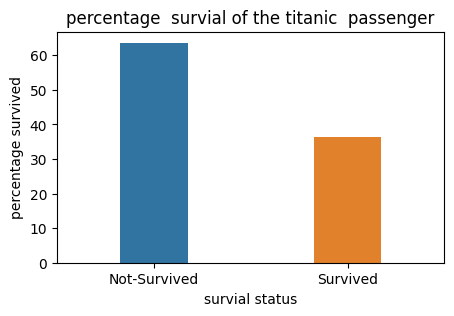

In [8]:
#PLOT THE SURVIVAL PERCENTAGE
plt.figure(figsize=(5,3))
sb.barplot(surv_data, x=['Not-Survived','Survived'], y='Percentage', width=0.35)
plt.ylabel('percentage survived')
plt.xlabel('survial status')
plt.title('percentage  survial of the titanic  passenger')


In [9]:
#CREATED THE FUNCTION TO SHOW SURVIVAL RATE ACCORDING TO GROUP
def surv_acc_to_grp(titanic_dataset,colname):
    plt.figure(figsize=(5,3))
    surv_by_pclass = titanic_dataset[['Survived',colname]].value_counts().reset_index()
    sb.barplot(surv_by_pclass, x=colname , y='count',hue='Survived')
    plt.ylabel("number of survived")
    plt.title(f'survival according to {colname}')
    

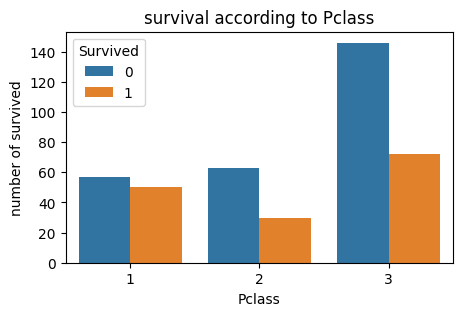

In [10]:
#FOR PCLASS
surv_acc_to_grp(titanic_dataset,'Pclass')

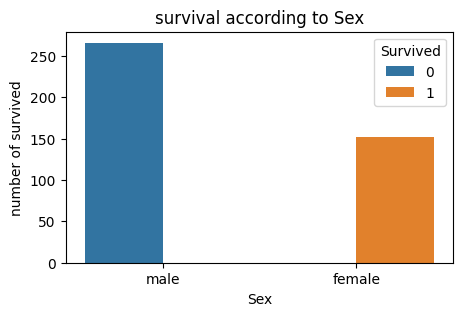

In [11]:
#FOR SEX
surv_acc_to_grp(titanic_dataset,'Sex')

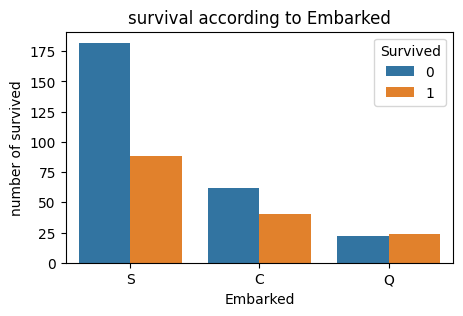

In [12]:
#FOR EMBARKED
surv_acc_to_grp(titanic_dataset,'Embarked')

In [13]:
#CREATED A FUNCTION TO SHOW DISTRIBUTION OF VARIABLES ACCORDING TO SURVIVAL
def var_acc_tosurv(titanic_dataset,colname):
    plt.figure(figsize=(5,3))
    sb.kdeplot(titanic_dataset,x=colname,hue='Survived')
    plt.title(f"{colname} distribution according to the survival")

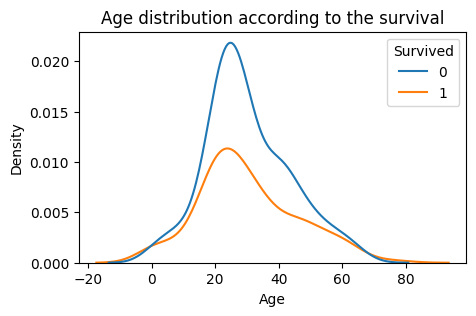

In [14]:
#AGE DISTRIBUTION
var_acc_tosurv(titanic_dataset,'Age')

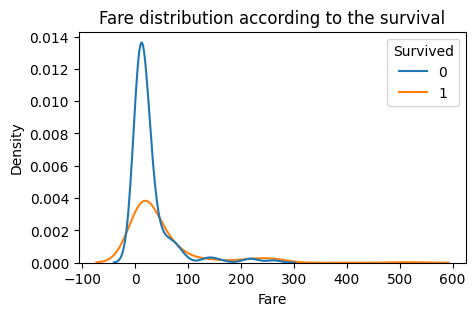

In [15]:
#FARE DISTRIBUTION
var_acc_tosurv(titanic_dataset,'Fare')

In [16]:
#CREATED FUNCTION TO VISUALISE COUNT ACCORDING TO SURVIVAL
def count_acc_tosurv(titanic_dataset,colname):
    plt.figure(figsize=(5,3))
    df1=titanic_dataset.groupby(['SibSp','Survived']).count()['PassengerId'].reset_index()
    sb.barplot(df1,x='SibSp',y='PassengerId',hue='Survived')
    plt.title(f'{colname} according to survival')
    plt.xlabel(f'{colname}')
    plt.ylabel(f'count')
    

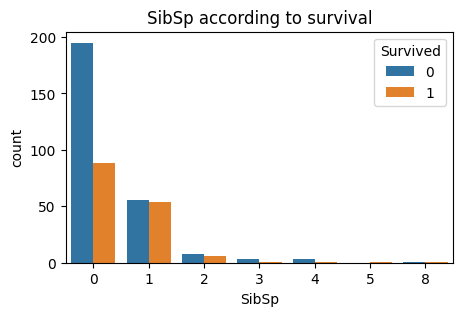

In [17]:
count_acc_tosurv(titanic_dataset,'SibSp')

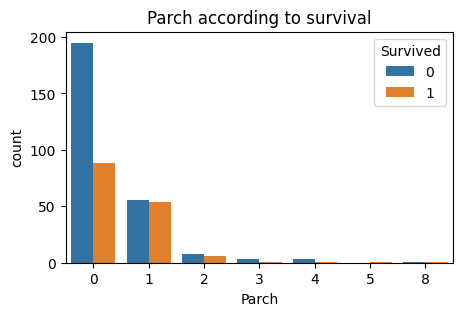

In [18]:
count_acc_tosurv(titanic_dataset,'Parch')

Text(0.5, 1.0, 'Comparison of the continous  variables')

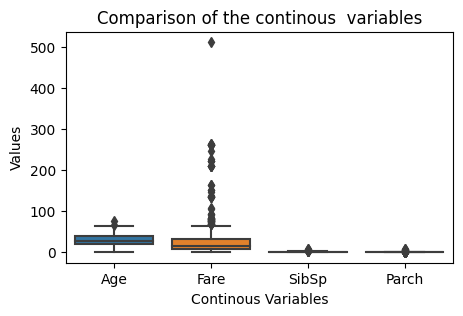

In [19]:
#CONTINOUS VARIABLES VARIABLITY & LOCATION
count_vars=pd.melt(titanic_dataset,value_vars=['Age','Fare','SibSp','Parch'])
plt.figure(figsize=(5,3))
sb.boxplot(count_vars,x='variable',y='value')
plt.xlabel('Continous Variables')
plt.ylabel('Values')
plt.title("Comparison of the continous  variables")



In [20]:
#TAKING OUT IMPORTANT FEATURES
titanic_dataset = titanic_dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [21]:
titanic_dataset.head()


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S

In [22]:
#DELETING ROWS THAT HAS NULL VALUES IN FARE
titanic_dataset = titanic_dataset.dropna(subset='Fare')

In [23]:
#FILLING UP THE MISSING VALUES OF THE 'AGE' COLUM BY MEDIAN AGE
titanic_dataset.loc[:, 'Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].median())


In [24]:
titanic_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
#HANDLING IMBALANCE
titanic_dataset_survived=titanic_dataset[titanic_dataset['Survived']==1]
titanic_dataset_notsurvived=titanic_dataset[titanic_dataset['Survived']==0]

titanic_dataset_survived_resampled=titanic_dataset.sample(n=titanic_dataset_notsurvived.shape[0],replace=True,random_state=101)
titanic_dataset_balance=pd.concat([titanic_dataset_notsurvived,titanic_dataset_survived_resampled]).sample(frac=1,random_state=26)
titanic_dataset_balance

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
195         0       3    male  33.0      0      0   7.8542        S
332         0       3    male  27.0      0      0   7.2250        C
219         0       3    male  27.0      0      0   8.0500        S
118         0       1    male  36.0      0      0  75.2417        C
240         1       1  female  55.0      0      0  27.7208        C
..        ...     ...     ...   ...    ...    ...      ...      ...
259         0       3    male  21.0      0      0   7.7750        S
128         0       2    male  42.0      0      0  13.0000        S
166         0       1    male  48.0      0      0  50.4958        C
125         1       3  female  17.0      0      1  16.1000        S
328         0       2    male  29.0      1      0  26.0000        S

[530 rows x 8 columns]

In [26]:
titanic_dataset_balance['Survived'].value_counts()

Survived
0    442
1     88
Name: count, dtype: int64

In [27]:
#SPLIT IN X & Y
x=titanic_dataset_balance.drop(['Survived'],axis=1)
y=titanic_dataset_balance['Survived']

In [28]:
#TRAIN-TEST-SPLIT
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1055)
print(f'''
x_train : {x_train.shape}
x_test : {x_test.shape}
y_train : {y_train.shape}
y_test : {y_test.shape}''')




x_train : (424, 7)
x_test : (106, 7)
y_train : (424,)
y_test : (106,)


# #BUILDING MODEL 


In [30]:
#PREPARING THE MODEL PIPLINE THAT INCLUDE
cont_cols =['Age','Fare']
disc_cols =['SibSp','Parch']
cat_cols=['Pclass','Sex','Embarked']

continous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
discrete_transformer = Pipeline(steps=[
     ('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cout',continous_transformer,cont_cols),
        ('disc',discrete_transformer,disc_cols),
        ('cat',categorical_transformer,cat_cols)])

model = Pipeline(steps=[('preprocessor',preprocessor),
                      ('clssifier',LogisticRegression())])
model.fit(x_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cout',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('clssifier', LogisticRegression())])

In [31]:
#PREDICTION
y_pred =model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
#CLASSIFICATION REPORT
cr =classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        12

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



Text(33.22222222222222, 0.5, 'predicted value')

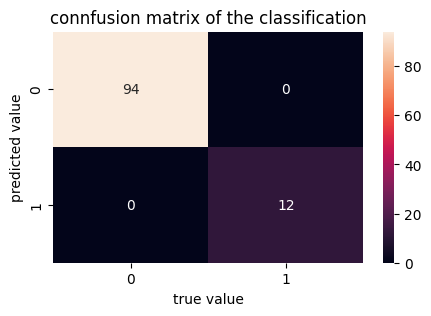

In [33]:
#CONFUSION-MATRIX
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sb.heatmap(cm,annot=True)
plt.title('connfusion matrix of the classification')
plt.xlabel('true value')
plt.ylabel('predicted value')

In [34]:
#save the model
with open('./model_logistic.pk1','wb') as fp:
    pickle.dump(model,fp)

In [35]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 1.0
